In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

filename = '/Users/mac/Desktop/BigData_ProjectData/SPARCS-2017.csv'

In [2]:
data = pd.read_csv(filename, encoding = "ISO-8859-1")
data.head()

/Users/mac/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,30 to 49,NaN,M,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Medicare,Self-Pay,NaN,N,N,114168.00,40464.04
1,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,50 to 69,105,M,White,Spanish/Hispanic,...,Moderate,Medical,Medicaid,Medicaid,Self-Pay,NaN,N,N,58517.00,26046.50
2,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,30 to 49,105,F,White,Unknown,...,Moderate,Medical,Department of Corrections,Self-Pay,NaN,NaN,N,N,39647.04,17397.59
3,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,50 to 69,105,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicaid,Medicaid,Self-Pay,NaN,N,N,36031.09,16118.84
4,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,18 to 29,105,F,White,Spanish/Hispanic,...,Minor,Medical,Department of Corrections,Self-Pay,NaN,NaN,N,N,30534.00,11921.05


In [3]:
np.shape(data)

(2343569, 34)

In [4]:
data.count()

Hospital Service Area                  2338414
Hospital County                        2338414
Operating Certificate Number           2338414
Permanent Facility Id                  2338414
Facility Name                          2343569
Age Group                              2343569
Zip Code - 3 digits                    2304550
Gender                                 2343569
Race                                   2343569
Ethnicity                              2343569
Length of Stay                         2343569
Type of Admission                      2343569
Patient Disposition                    2343569
Discharge Year                         2343569
CCS Diagnosis Code                     2343569
CCS Diagnosis Description              2343569
CCS Procedure Code                     2343569
CCS Procedure Description              2343569
APR DRG Code                           2343569
APR DRG Description                    2343569
APR MDC Code                           2343569
APR MDC Descr

Columns containing missing values, #values/#rows:
Hospital Service Area 99.78%
Hospital County 99.78%
Operating Certificate Number 99.78%
Permanent Facility Id 99.78%
Zip Code - 3 digits 98.33%
APR Severity of Illness Description 99.99%
APR Risk of Mortality 99.99%
Payment Typology 2 62.5%
Payment Typology 3 25.87%
Birth Weight 9.7% 

In [15]:
np.shape(data[data["Hospital Service Area"] != ""])

(2343569, 34)

In [19]:
data2 = data.dropna(subset = ['Hospital Service Area','Zip Code - 3 digits',
                             'APR Risk of Mortality'])
data2.count()

Hospital Service Area                  2304316
Hospital County                        2304316
Operating Certificate Number           2304316
Permanent Facility Id                  2304316
Facility Name                          2304316
Age Group                              2304316
Zip Code - 3 digits                    2304316
Gender                                 2304316
Race                                   2304316
Ethnicity                              2304316
Length of Stay                         2304316
Type of Admission                      2304316
Patient Disposition                    2304316
Discharge Year                         2304316
CCS Diagnosis Code                     2304316
CCS Diagnosis Description              2304316
CCS Procedure Code                     2304316
CCS Procedure Description              2304316
APR DRG Code                           2304316
APR DRG Description                    2304316
APR MDC Code                           2304316
APR MDC Descr

3351 records of "Abortion Edit Indicator"=='Y', plus 2338414 records of Hospital Service Area, equal to 2341765. Less than 2343569, which means that some of the NA records in Hospital Service Area are not abortion.

Records before dropping 2343569, after dropping 2304316, so drop rate 1.7%. No NA records (except payment typology 2&3), no abortion records.

Or we could do abortion analysis (around 3000) on race, etc, no geographical.

In [17]:
set(data2["Abortion Edit Indicator"])

{'N'}

Drop list:
1. Discharge Year: only one value, 2017
2. Abortion Edit Indicator: after dropping na, only one value, N for no abortion.
3. Operating Certificate Number: The facility Operating Certificate Number as assigned by NYS Department of Health.
4. Permanent Facility Id: almost 1-to-1 correspondence to "Facility Name" with slight difference. 
5. CCS Diagnosis Code: 1-to-1 correspondence to "CCS Diagnosis Description".
6. CCS Procedure Code": 1-to-1 correspondence to "CCS Procedure Description".
7. APR MDC Code: 1-to-1 correspondence to "APR MDC Description"
8. APR Severity of Illness Code: 1-to-1 correspondence to "APR Severity of Illness Description".
9. APR DRG Code: 1-to-1 correspondence to "APR DRG Description".


In [54]:
droplist = ["Discharge Year","Abortion Edit Indicator",
            "Operating Certificate Number","Permanent Facility Id",
            "CCS Diagnosis Code","CCS Procedure Code",
            "APR MDC Code","APR Severity of Illness Code",
           "APR DRG Code"]

In [55]:
data3 = data2.drop(droplist, axis=1)
print(np.shape(data3))
data3.head()

(2304316, 25)


,Hospital Service Area,Hospital County,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
1,Hudson Valley,Westchester,Montefiore Mount Vernon Hospital,50 to 69,105,M,White,Spanish/Hispanic,8,Emergency,...,Major,Moderate,Medical,Medicaid,Medicaid,Self-Pay,NaN,N,58517.00,26046.50
2,Hudson Valley,Westchester,Montefiore Mount Vernon Hospital,30 to 49,105,F,White,Unknown,6,Emergency,...,Moderate,Moderate,Medical,Department of Corrections,Self-Pay,NaN,NaN,N,39647.04,17397.59
3,Hudson Valley,Westchester,Montefiore Mount Vernon Hospital,50 to 69,105,F,White,Not Span/Hispanic,4,Emergency,...,Moderate,Moderate,Medical,Medicaid,Medicaid,Self-Pay,NaN,N,36031.09,16118.84
4,Hudson Valley,Westchester,Montefiore Mount Vernon Hospital,18 to 29,105,F,White,Spanish/Hispanic,4,Emergency,...,Moderate,Minor,Medical,Department of Corrections,Self-Pay,NaN,NaN,N,30534.00,11921.05
5,Hudson Valley,Westchester,Montefiore Mount Vernon Hospital,50 to 69,105,M,Black/African American,Not Span/Hispanic,3,Emergency,...,Major,Major,Medical,Medicare,Medicare,Self-Pay,NaN,N,49290.08,18503.26


In [56]:
data3.nunique()

Hospital Service Area                        8
Hospital County                             57
Facility Name                              209
Age Group                                    5
Zip Code - 3 digits                         50
Gender                                       3
Race                                         4
Ethnicity                                    4
Length of Stay                             120
Type of Admission                            6
Patient Disposition                         20
CCS Diagnosis Description                  259
CCS Procedure Description                  222
APR DRG Description                        312
APR MDC Description                         24
APR Severity of Illness Description          4
APR Risk of Mortality                        4
APR Medical Surgical Description             2
Payment Typology 1                          10
Payment Typology 2                          10
Payment Typology 3                          10
Birth Weight 

In [57]:
data3.count()

Hospital Service Area                  2304316
Hospital County                        2304316
Facility Name                          2304316
Age Group                              2304316
Zip Code - 3 digits                    2304316
Gender                                 2304316
Race                                   2304316
Ethnicity                              2304316
Length of Stay                         2304316
Type of Admission                      2304316
Patient Disposition                    2304316
CCS Diagnosis Description              2304316
CCS Procedure Description              2304316
APR DRG Description                    2304316
APR MDC Description                    2304316
APR Severity of Illness Description    2304316
APR Risk of Mortality                  2304316
APR Medical Surgical Description       2304316
Payment Typology 1                     2304316
Payment Typology 2                     1442659
Payment Typology 3                      597397
Birth Weight 

In [27]:
a = data2["Permanent Facility Id"].value_counts()

In [39]:
a

1456.0    51576
1464.0    48296
541.0     47991
1458.0    45253
1630.0    43405
          ...  
817.0        29
111.0        15
37.0         15
309.0         9
414.0         2
Name: Permanent Facility Id, Length: 210, dtype: int64

In [42]:
akeys = a.keys().tolist()
bkeys = b.keys().tolist()

In [28]:
b = data2["Facility Name"].value_counts()

In [41]:
alist = a.tolist()
blist = b.tolist()

In [44]:
for i in range(len(alist)):
    if alist[i] != blist[i]:
        print(akeys[i-1], alist[i-1], bkeys[i-1],blist[i-1])
        print(akeys[i], alist[i], bkeys[i], blist[i])
        print(akeys[i+1], alist[i+1], bkeys[i+1], blist[i+1])
        break

628.0 7487 UPSTATE University Hospital at Community General 7487
1186.0 7180 UPMC Chautauqua at WCA 7438
752.0 6998 North Central Bronx Hospital 7180


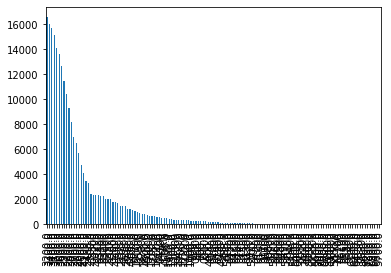

In [13]:
data["Birth Weight"].value_counts().plot.bar()
plt.show()

In [45]:
len(data2[data2["Zip Code - 3 digits"]=="OOS"])

66753

In [46]:
set(data2["Patient Disposition"])

{'Admitted from Ambulatory Surgery',
 'Another Type Not Listed',
 "Cancer Center or Children's Hospital",
 'Court/Law Enforcement',
 'Critical Access Hospital',
 'Expired',
 'Facility w/ Custodial/Supportive Care',
 'Federal Health Care Facility',
 'Home or Self Care',
 'Home w/ Home Health Services',
 'Hosp Basd Medicare Approved Swing Bed',
 'Hospice - Home',
 'Hospice - Medical Facility',
 'Inpatient Rehabilitation Facility',
 'Left Against Medical Advice',
 'Medicaid Cert Nursing Facility',
 'Medicare Cert Long Term Care Hospital',
 'Psychiatric Hospital or Unit of Hosp',
 'Short-term Hospital',
 'Skilled Nursing Home'}

In [49]:
data2["APR MDC Code"].value_counts()

5     297917
14    239750
15    221170
8     208123
4     189783
6     187956
1     149058
18    138232
19    111984
11     98742
10     78870
20     74309
7      63320
9      58789
16     33395
3      31517
23     29148
21     26747
13     23259
17     22421
12     10332
25      3861
2       3554
22      2079
Name: APR MDC Code, dtype: int64

In [50]:
data2["APR MDC Description"].value_counts()

Diseases and Disorders of the Circulatory System                                                        297917
Pregnancy, Childbirth and the Puerperium                                                                239750
Newborns and Other Neonates with Conditions Originating in the Perinatal Period                         221170
Diseases and Disorders of the Musculoskeletal System and Conn Tissue                                    208123
Diseases and Disorders of the Respiratory System                                                        189783
Diseases and Disorders of the Digestive System                                                          187956
Diseases and Disorders of the Nervous System                                                            149058
Infectious and Parasitic Diseases, Systemic or Unspecified Sites                                        138232
Mental Diseases and Disorders                                                                           111984
D